### Step 0: Imports & Setup

In [13]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# For reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)


### Step 1: Load & Explore Dataset

- MNIST images: 28x28 grayscale pixels
- Labels: digits 0–9

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


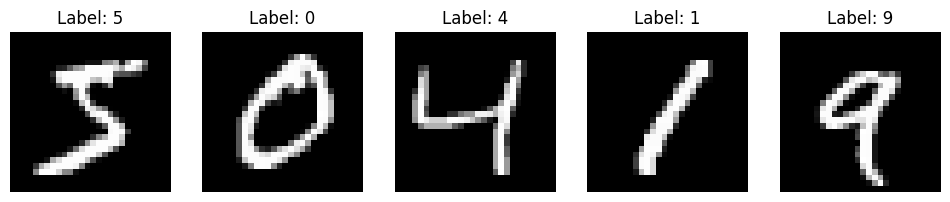

In [14]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

# Visualize some samples
fig, axes = plt.subplots(1, 5, figsize=(12,3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()


### Step 2: Preprocessing

In [15]:
# Normalize pixel values to [0,1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("Shape after preprocessing:", X_train.shape, y_train_cat.shape)


Shape after preprocessing: (60000, 28, 28) (60000, 10)


### Step 3: Build Neural Network

- Flatten: converts 2D image to 1D vector

- Dense: fully connected layer

- Dropout: randomly disables neurons during training to improve generalization

- Softmax: converts outputs to probabilities for 10 classes

In [16]:
# Sequential model
model = Sequential([
    Flatten(input_shape=(28,28)),      # Flatten 28x28 to 784
    Dense(128, activation='relu'),     # Hidden layer with 128 neurons
    Dropout(0.2),                      # Regularization to avoid overfitting
    Dense(64, activation='relu'),      # Another hidden layer
    Dense(10, activation='softmax')    # Output layer for 10 classes
])

# Show model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### Step 4: Compile Model
- Optimizer: Adam (adaptive learning rate)
- Loss: categorical crossentropy (for multi-class classification)
- Metrics: accuracy

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Step 5: Train Model
- Tracks training and validation loss/accuracy
- Can adjust epochs or batch_size to experiment

In [18]:
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,  # 20% of training used as validation
    epochs=15,
    batch_size=64,
    verbose=2
)

Epoch 1/15
750/750 - 1s - 2ms/step - accuracy: 0.8934 - loss: 0.3640 - val_accuracy: 0.9550 - val_loss: 0.1538
Epoch 2/15
750/750 - 1s - 950us/step - accuracy: 0.9529 - loss: 0.1584 - val_accuracy: 0.9644 - val_loss: 0.1161
Epoch 3/15
750/750 - 1s - 974us/step - accuracy: 0.9628 - loss: 0.1193 - val_accuracy: 0.9683 - val_loss: 0.1065
Epoch 4/15
750/750 - 1s - 1ms/step - accuracy: 0.9704 - loss: 0.0989 - val_accuracy: 0.9701 - val_loss: 0.0981
Epoch 5/15
750/750 - 1s - 949us/step - accuracy: 0.9746 - loss: 0.0831 - val_accuracy: 0.9714 - val_loss: 0.0931
Epoch 6/15
750/750 - 1s - 928us/step - accuracy: 0.9779 - loss: 0.0704 - val_accuracy: 0.9742 - val_loss: 0.0883
Epoch 7/15
750/750 - 1s - 925us/step - accuracy: 0.9789 - loss: 0.0659 - val_accuracy: 0.9748 - val_loss: 0.0854
Epoch 8/15
750/750 - 1s - 931us/step - accuracy: 0.9801 - loss: 0.0611 - val_accuracy: 0.9755 - val_loss: 0.0847
Epoch 9/15
750/750 - 1s - 931us/step - accuracy: 0.9825 - loss: 0.0531 - val_accuracy: 0.9776 - val_

### Step 6: Visualize Training History

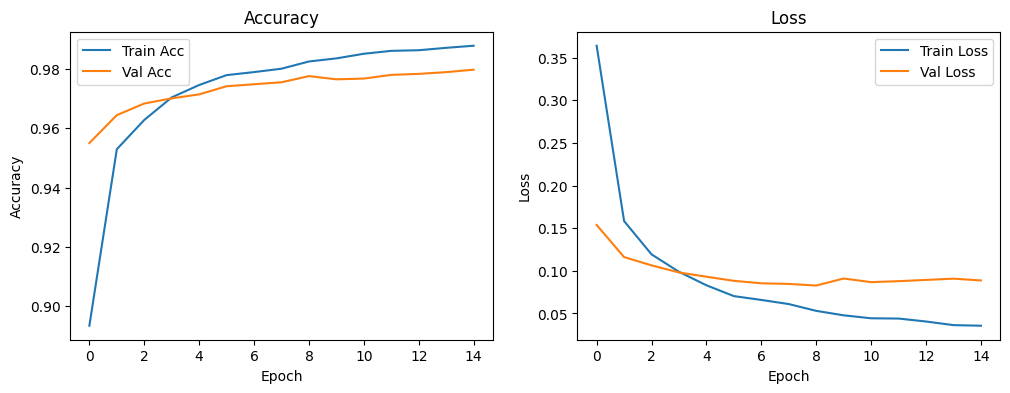

In [19]:
# Accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### Step 7: Evaluate on Test Set

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Predict some samples
y_pred = model.predict(X_test[:20])
y_pred_labels = np.argmax(y_pred, axis=1)

print("Predicted labels:", y_pred_labels)
print("True labels:     ", y_test[:20])

Test Accuracy: 0.9777, Test Loss: 0.0863
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
True labels:      [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


FileNotFoundError: [Errno 2] No such file or directory: 'results.json'

### Step 8: Conclusion

- Neural network learned to classify digits >90% accuracy with a simple architecture

- Early layers extract basic patterns; deeper layers capture complex shapes

- Next step: Convolutional Neural Networks (CNNs) for images → better performance